In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster
import numpy as np

from google.colab import drive
drive.mount('/gdrive')
#Change current working directory to gdrive
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
#Read files
datafile = r'/gdrive/My Drive/Data Projects/Marketing Analytics/Lesson 4/four_cols.csv'
df = pd.read_csv(datafile) #creates a dataframe
df.head()

,income,age,days_since_purchase,annual_spend
0,37453,48,504,4441
1,50775,50,566,4239
2,71047,41,326,5834
3,52239,52,259,5456
4,112343,27,279,1749


**Standardize Data**

In [3]:
cols = df.columns
zcols = []
for col in cols:
    df['z_' + col] = (df[col] - df[col].mean())/df[col].std()
    zcols.append('z_' + col)

In [4]:
df.head()

,income,age,days_since_purchase,annual_spend,z_income,z_age,z_days_since_purchase,z_annual_spend
0,37453,48,504,4441,-0.889981,0.604558,0.752880,0.062245
1,50775,50,566,4239,-0.552817,0.788959,1.305708,-0.058910
2,71047,41,326,5834,-0.039758,-0.040845,-0.834271,0.897732
3,52239,52,259,5456,-0.515765,0.973360,-1.431681,0.671017
4,112343,27,279,1749,1.005394,-1.331651,-1.253350,-1.552352


**Plot the data using dimensionality reduction PCA**

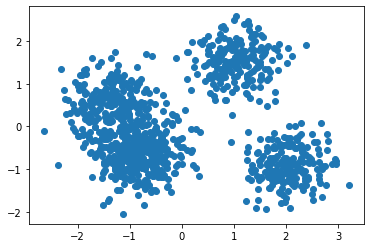

In [6]:

from sklearn import decomposition
import matplotlib.pyplot as plt
%matplotlib inline

pca = decomposition.PCA(n_components=2)
df['pc1'], df['pc2'] = zip(*pca.fit_transform(df[zcols]))

plt.scatter(df['pc1'], df['pc2'])
plt.show()

**Visualize with 2 to 7 clusters**

In [18]:
#define colors and shapes used for each cluster for visualization

colors = ['r', 'b', 'k', 'g', 'm', 'y', 'c']
markers = ['^', 'o', 'd', 's', 'P', 'X', 'v']

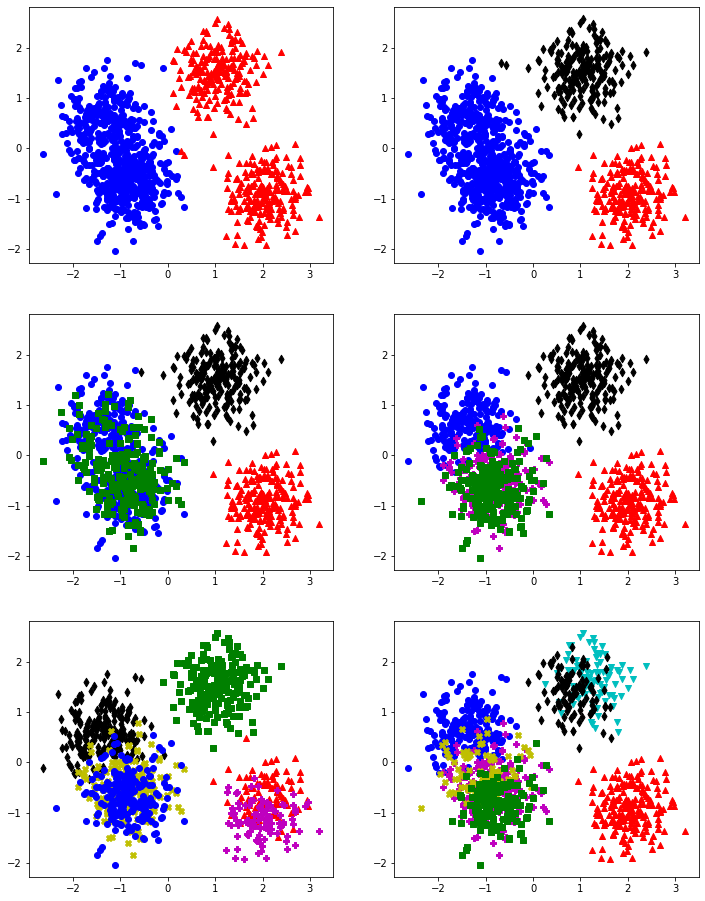

In [23]:
plt.figure(figsize=(12,16))

for n in range(2,8):
    model = cluster.KMeans(n_clusters=n, random_state=10)
    df['cluster'] = model.fit_predict(df[zcols])

    plt.subplot(3, 2, n-1)
    for c in df['cluster'].unique():
        d = df[df['cluster'] == c]
        plt.scatter(d['pc1'], d['pc2'], marker=markers[c], color=colors[c])    

plt.show()

**Use Elbow Method**

In [28]:
ss = []
krange = list(range(2,11))
X = df[zcols].values

In [29]:
for n in krange:
    model = cluster.KMeans(n_clusters=n, random_state=10)
    model.fit_predict(X)
    cluster_assignments = model.labels_
    centers = model.cluster_centers_
    ss.append(np.sum((X - centers[cluster_assignments]) ** 2))

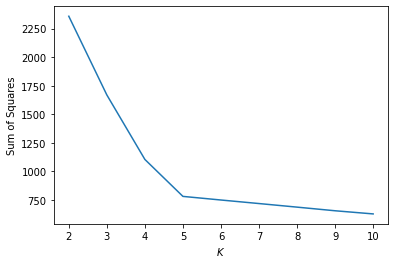

In [30]:
plt.plot(krange, ss)
plt.xlabel("$K$")
plt.ylabel("Sum of Squares")
plt.show()

Can see that the elbow is at k = 5, therefore 5 clusters should be selected. 

**Perform k-means clustering with 5 clusters**

In [36]:
model = cluster.KMeans(n_clusters=5, random_state=10)
model.fit(df[['z_income', 'z_age', 'z_days_since_purchase', 'z_annual_spend']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [37]:
df['cluster'] = model.labels_
df.head()

,income,age,days_since_purchase,annual_spend,z_income,z_age,z_days_since_purchase,z_annual_spend,pc1,pc2,cluster
0,37453,48,504,4441,-0.889981,0.604558,0.752880,0.062245,-0.854598,0.934693,1
1,50775,50,566,4239,-0.552817,0.788959,1.305708,-0.058910,-0.963359,1.046790,1
2,71047,41,326,5834,-0.039758,-0.040845,-0.834271,0.897732,-0.350770,-0.741905,4
3,52239,52,259,5456,-0.515765,0.973360,-1.431681,0.671017,-0.833124,-0.960460,4
4,112343,27,279,1749,1.005394,-1.331651,-1.253350,-1.552352,2.475590,-0.755466,0


In [40]:
#look at the means of the variables of each cluster to see what the cluster is capturing
for cluster in df['cluster'].unique():
    print("Cluster: " + str(cluster))
    for col in ['z_income', 'z_age', 'z_days_since_purchase', 'z_annual_spend']:
        print(col + ": {:.2f}".format(df.loc[df['cluster'] == cluster, col].mean()))

Cluster: 1
z_income: -0.75
z_age: 0.79
z_days_since_purchase: 0.76
z_annual_spend: 0.74
Cluster: 4
z_income: -0.72
z_age: 0.69
z_days_since_purchase: -1.09
z_annual_spend: 0.74
Cluster: 0
z_income: 1.11
z_age: -1.12
z_days_since_purchase: -1.12
z_annual_spend: -1.10
Cluster: 2
z_income: -0.76
z_age: -1.05
z_days_since_purchase: 0.72
z_annual_spend: -1.10
Cluster: 3
z_income: 1.09
z_age: 0.69
z_days_since_purchase: 0.70
z_annual_spend: 0.72


**Export to Excel**

In [41]:
df.to_csv('/gdrive/My Drive/Data Projects/Marketing Analytics/Lesson 4/ClothingCustomerClusters.csv')

**Clustering Analysis**

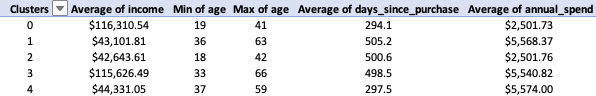

I analyzed the min and max for each column and found that the age had a large and overlapping range. I therefore concluded that age was not an important factor for this clustering. I then took the average of the other fields to determine patterns.

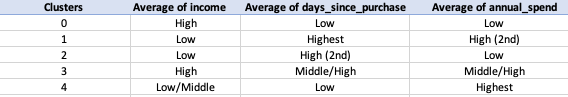

This table shows my conclusions for important characteristics of each cluster. 

Prior to clustering this data, I would have assumed a higher average income correlated to a higher average annual spend. However, Cluster 4's average income ranks in the middle, with an average not too much more than the first and second lowest income, and yet has the highest average annual spend. Additionally, they have a low average number of days since their last purchase. The customers in this cluster appear to have a lower income range, but shop frequently at the store, resulting in a higher annual spend. This cluster of customers could be receptive to a customer loyalty program that would encourage them to purchase and spend even more.

Another observation is that the highest average income spends the least annually. However, they also have the lowest average number of days since their last purchase. There is a potential opportunity to target these customers with discounts and other promotions to encourage them to purchase more frequently.